In [35]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.display(genepattern.session.register("https://cloud.genepattern.org/gp", "", ""))

GPAuthWidget()

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Step 1:
Defined the function 'read_gct' which takes in a GenePattern '.gct' file and outputs the data to a Pandas dataframe 
- Skipped the first 2 header rows of the '.gct' file 
- Set 'Name' and 'Description' columns as indexes rather than them being apart of the data
- Summary boolean; if denoted true in the function call, it prints the dataframe's # of rows and columns

In [23]:
#1
def read_gct(file, summary = False): #returns a pd dataframe
    df = pd.read_csv(file, sep = "\t", skiprows = 2) 

    df = df.set_index(["Name", "Description"])
    rows, cols = df.shape

    if summary:
        print("Rows: " + str(rows) + "; Cols: " + str(cols))
        print(df)

    return df

Step 2:
- Read in 'BRCA_minimal_60x19.gct' into a dataframe
- Read in 'BRCA_large_20783x40.gct' into a dataframe

In [24]:
#2a
minBRCA = read_gct("BRCA_minimal_60x19.gct", True)

#2b
largeBRCA = read_gct("BRCA_large_20783x40.gct")

Rows: 60; Cols: 19
                               A7-A0CE-Normal  A7-A0CH-Normal  A7-A0D9-Normal  \
Name     Description                                                            
COL1A1   NCBI Gene ID: 1277        52818.7302      23289.8919      17914.9695   
SCD      NCBI Gene ID: 6319         5162.2222      54122.0498      35382.3829   
CPB1     NCBI Gene ID: 1360         5948.8889        844.0056         84.0122   
COL1A2   NCBI Gene ID: 1278        44192.3810      40442.3131      36163.4420   
ADIPOQ   NCBI Gene ID: 9370         1317.1429      23352.3272     121017.3116   
COL3A1   NCBI Gene ID: 1281        39902.8571      27017.9596      43704.1752   
FN1      NCBI Gene ID: 2335        10179.6825      20482.9337      19109.4705   
ADH1B    NCBI Gene ID: 125          3812.6984      15351.9511      63057.0265   
AHNAK    NCBI Gene ID: 79026       45596.8254      87593.4180     240497.4542   
EEF1A1   NCBI Gene ID: 1915       159401.5873     143488.1053     111557.0265   
MGP      

Step 3:
Defined the function 'histogram' that utilizes matplotlib to graphically visualize the distribution of Gene Expression for a set of samples (in this case, samples: "A7-A0DB-normal", "A7-A13E-normal", "BH-A0B3-primary", "BH-A0B5-primary")
- Bin width of 250 Gene Expression Values
- Histogram range from 0 - 50000 Expression Values
- Log Scale

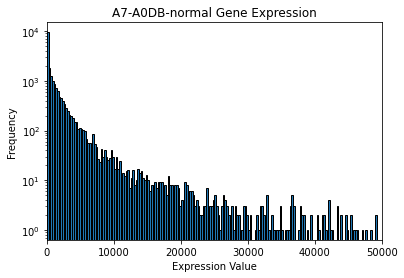

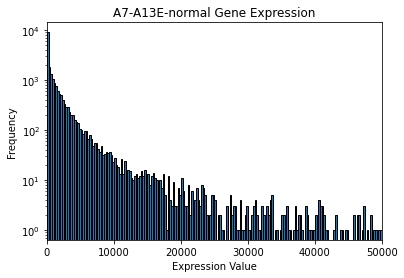

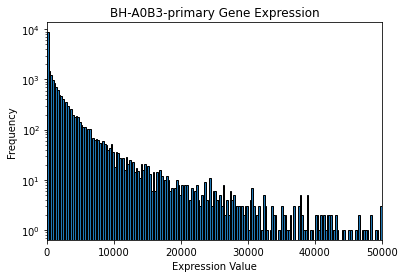

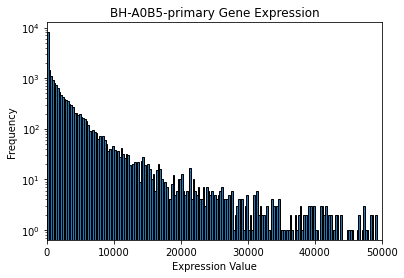

In [30]:
#3
bin_width = 250   
bins = np.arange(0, 50000 + bin_width, bin_width)

samples = ["A7-A0DB-normal", "A7-A13E-normal", "BH-A0B3-primary", "BH-A0B5-primary"]

def histogram(file, cols, binInfo, title = "", xlabel = "Value", ylabel = "Frequency", xlim = None, ylim = None):
    for col in cols:
        plt.figure()
        plt.hist(file[col], bins = binInfo, edgecolor = 'black', log = True)
        plt.title(str(col) + " " + title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        if xlim:
            plt.xlim(xlim)
        if ylim:
            plt.ylim(ylim)
        plt.show()
        
histogram(largeBRCA, samples, bins, title = "Gene Expression", xlabel = "Expression Value", xlim = (0, 50000))

Step 4: 
Calculated the mean, median, and Standard Deviation for all samples of 'largeBRCA' and concatted the summary statistics into a Pandas Dataframe for easier analysis
- Assigned a dictionary to a dataframe where each 'key' was a column name and the 'value' where the columns corresponding values
- Statistics rounded to 2 decimal places
- First rows of df_stats are displayed

In [26]:
#4
means = largeBRCA.mean(axis=0)
medians = largeBRCA.median(axis=0)
stds = largeBRCA.std(axis=0)

df_stats = pd.DataFrame ({
    "Mean": means,
    "Median": medians,
    "Std": stds
    }).reset_index().rename(columns = {"index": "Samples"}).round(2)

df_stats.head()

,Samples,Mean,Median,Std
0,A7-A0CE-normal,3308.88,814.0,12725.53
1,A7-A0CH-normal,3046.32,630.0,14145.45
2,A7-A0D9-normal,2628.13,350.0,17827.39
3,A7-A0DB-normal,2354.67,362.0,13973.91
4,A7-A13E-normal,2380.70,427.0,13373.50


Step 5a: 
Filtering Low Expression Genes (Expression Value < 1000)
- row_max is a series of max values per row of 'largeBRCA'
- keep is a True/False Boolean Series that indicates 'True' for every row whose max >= 1000
- 'largeBRCA_filtered' is a dateframe of *only* the rows with max values >= 1000

Step 5b:
Calculating new means and medians for filtered data
- Assigned a dictionary to a dataframe where each 'key' was a column name and the 'value' where the columns corresponding values
- Statistics rounded to 2 decimal places
- First rows of df_filtered_stats are displayed

In [27]:
#5a
row_max = largeBRCA.max(axis=1)
keep = row_max >= 1000
largeBRCA_filtered = largeBRCA[keep]

#5b
means_filtered = largeBRCA_filtered.mean(axis = 0)
medians_filtered = largeBRCA_filtered.median(axis = 0)

df_filtered_stats = pd.DataFrame({
    "Mean (Filtered)" : means_filtered,
    "Median (Filtered)" : medians_filtered
}).round(2)

df_filtered_stats.head()

,Mean (Filtered),Median (Filtered)
A7-A0CE-normal,5058.27,2130.0
A7-A0CH-normal,4665.27,1720.0
A7-A0D9-normal,4030.65,1150.0
A7-A0DB-normal,3608.26,1150.0
A7-A13E-normal,3647.49,1252.0


Step 5b(cont):
Histograms for samples "A7-A0DB-normal", "A7-A13E-normal", "BH-A0B3-primary", "BH-A0B5-primary" with filtered data 

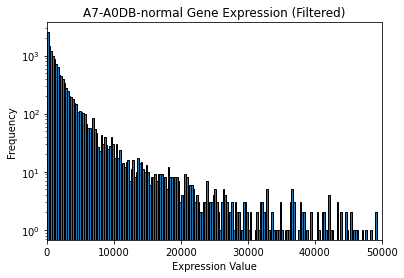

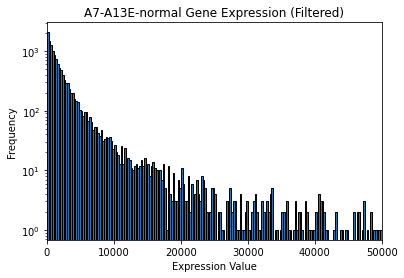

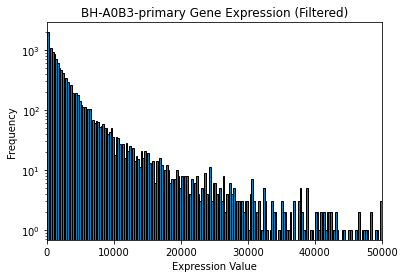

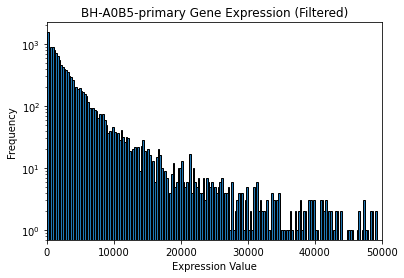

In [29]:
histogram(largeBRCA_filtered, samples, bins, title = "Gene Expression (Filtered)", xlabel = "Expression Value", xlim = (0, 50000))